#Entrega Final Talento Tech

Alumno = Francisco Cirigliano<br>
Comisión = 25262

# Etapa 1  = Recopilación y preparación de Datos

**objetivo**: En esta etapa se busca poner en práctica conomcineto de Python, familizarizarse con el entorno de traba y aplcair operaciones básicas de manejo de datos

## 1 . Carga de datos:



In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montamos nuestra unidad de Drive y damos acceso a colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#verificamos que los archivos csv se encuentren en la carpeta dataset
import os
os.listdir('/content/drive/MyDrive/datasets')

['clientes.csv',
 'marketing.csv',
 'ventas.csv',
 'marketing_limpio.csv',
 'ventas_limpio.csv',
 'clientes_limpio.csv']

In [ ]:
#Definimos las rutas de los datasets
ruta_clientes = '/content/drive/MyDrive/datasets/clientes.csv'
ruta_marketing = '/content/drive/MyDrive/datasets/marketing.csv'
ruta_ventas = '/content/drive/MyDrive/datasets/ventas.csv'

#Cargamos los csv como DataFrames

ventas = pd.read_csv(ruta_ventas)
marketing = pd.read_csv(ruta_marketing)
clientes = pd.read_csv(ruta_clientes)

In [ ]:
#Corroboramos que han sido cargados exitosamente los csv
print('Ventas shape:',ventas.shape)
print('Marketing shape:',marketing.shape)
print('Clientes shape:',clientes.shape)

Ventas shape: (3035, 6)
Marketing shape: (90, 6)
Clientes shape: (567, 5)


In [ ]:
# Creo una función para el análisis exploratorio
def eda (df, nombre):
  print(f'Análisis exploratorio de {nombre}')
  print('shape:', df.shape, '\n')
  print('columns:', df.columns,'\n')
  print('dptypes: ', df.dtypes,'\n')
  print('head:'),
  display(df.head(10),'\n')
  print('info:', df.info(),'\n')
  print('describe:')
  display(df.describe(),'\n')

In [ ]:
#Creamos la funcion calidad para corroborar la calidad de datos de los df
def calidad (df, nombre, clave=None):
  print(f' Análisis de calidad:  {nombre}')

  display (df.isna().sum().to_frame("nulos"))
  print(' Filas duplicadas = ', df.duplicated(keep= False).sum())

  if clave and clave in df.columns:
      clave_dup = df[clave].duplicated(keep =False).sum()
      print(f'Claves duplicadas {clave} =',clave_dup)

      if clave_dup >= 1 :
        dup_ordenados =  df[df[clave].duplicated(keep = False)][clave].value_counts().sort_values(ascending = False)

        print('\n Los valores más duplicados son:')
        display(dup_ordenados.head(10))

      else :
          print(f'No se encontraron duplicados en la clave {clave}')

  else:
      if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
      else:
            print("No se indicó una clave para analizar duplicados por columna.")

In [ ]:
#Normalizamos texto
def normalizar_texto (df):
  for columna in df.columns:
    if df[columna].dtype == 'object':
      df[columna] = df[columna].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(' +', ' ').str.title()
  return df

In [ ]:
#Normalizo fecha
def normalizar_fecha (df, columna):
  df[columna] = pd.to_datetime(df[columna], errors='coerce',dayfirst= True)
  return df

## 2. Análisis exploratorio Inicial

In [ ]:
# Análisis exploratorio Ventas
eda(ventas, 'Ventas')

Análisis exploratorio de Ventas
shape: (3035, 6) 

columns: Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object') 

dptypes:  id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object 

head:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
5,1697,Horno eléctrico,$35.35,9.0,02/01/2024,Electrodomésticos
6,1710,Plancha de vapor,$65.43,2.0,02/01/2024,Electrodomésticos
7,2959,Proyector,$88.17,9.0,02/01/2024,Electrónica
8,318,Rincón de plantas,$79.86,11.0,03/01/2024,Decoración
9,419,Candelabro,$66.11,8.0,03/01/2024,Decoración


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB
info: None 

describe:


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


'\n'

In [ ]:
# Análisis exploratorio marketing
eda(marketing, 'marketing')

Análisis exploratorio de marketing
shape: (90, 6) 

columns: Index(['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio',
       'fecha_fin'],
      dtype='object') 

dptypes:  id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object 

head:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024
5,85,SmartWatch,TV,5.07,01/04/2024,05/05/2024
6,36,Plancha de vapor,Email,5.41,02/04/2024,01/06/2024
7,57,Batidora,Email,4.48,10/04/2024,08/06/2024
8,44,Adorno de pared,Email,5.08,13/04/2024,10/05/2024
9,84,Parlantes Bluetooth,TV,4.42,17/04/2024,05/05/2024


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB
info: None 

describe:


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


'\n'

In [ ]:
# Análisis exploratorio clientes
eda(clientes, 'clientes')

Análisis exploratorio de clientes
shape: (567, 5) 

columns: Index(['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos'], dtype='object') 

dptypes:  id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object 

head:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
5,6,Patrick Earle,34,San Miguel de Tucumán,62763.31
6,7,Etan Deeth,35,Resistencia,37489.71
7,8,Booth Bielfelt,40,Córdoba,35255.94
8,9,Shirl Labone,29,Rosario,27592.08
9,10,Andy Mendenhall,52,Rosario,37153.94


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
info: None 

describe:


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


'\n'

## 3. Calidad de los datos

In [ ]:
#Calidad de datos de ventas
calidad(ventas, "VENTAS", clave="id_venta")

 Análisis de calidad:  VENTAS


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


 Filas duplicadas =  70
Claves duplicadas id_venta = 70

 Los valores más duplicados son:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [ ]:
#Calidad de datos de marketing
calidad(marketing, "marketing", clave="id_campanha")

 Análisis de calidad:  marketing


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


 Filas duplicadas =  0
Claves duplicadas id_campanha = 0
No se encontraron duplicados en la clave id_campanha


In [ ]:
#Calidad de datos de clientes
calidad(clientes, "clientes", clave="id_cliente")

 Análisis de calidad:  clientes


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


 Filas duplicadas =  0
Claves duplicadas id_cliente = 0
No se encontraron duplicados en la clave id_cliente


#Etapa 2 = Preprocesamiento y Limpieza de datos

**objetivo** = Mostrar conocimiento en los procesos de limpieza y correción de datos

##4. Limpieza de datos

In [ ]:
#Creo una copia de los dataframes para comenzar la limpieza
ventas_limpio = ventas.copy()
marketing_limpio = marketing.copy()
clientes_limpio = clientes.copy()

In [ ]:
#Elimino duplicados
ventas_limpio = ventas_limpio.drop_duplicates()
marketing_limpio = marketing_limpio.drop_duplicates()
clientes_limpio = clientes_limpio.drop_duplicates()

In [ ]:
print(ventas_limpio.duplicated().sum())
print(marketing_limpio.duplicated().sum())
print(clientes_limpio.duplicated().sum())

0
0
0


In [ ]:
ventas_limpio = normalizar_texto(ventas_limpio)
marketing_limpio = normalizar_texto(marketing_limpio)
clientes_limpio = normalizar_texto(clientes_limpio)

In [ ]:
print(ventas_limpio.head())
print(marketing_limpio.head())
print(clientes_limpio.head())

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara De Mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno De Pared     Tv   4.81   20/03/2024  03/05/2024
1           12           Tablet   Rrss   3.40   26/03/2024  13/05/2024
2           32  Lámpara De Mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   Rrss   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024
   id_cliente               nombre  edad     

In [ ]:
print(ventas_limpio.columns)
print(marketing_limpio.columns)
print(clientes_limpio.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')
Index(['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio',
       'fecha_fin'],
      dtype='object')
Index(['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')


In [ ]:
print (ventas_limpio.head())
print (marketing_limpio.head())

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara De Mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno De Pared     Tv   4.81   20/03/2024  03/05/2024
1           12           Tablet   Rrss   3.40   26/03/2024  13/05/2024
2           32  Lámpara De Mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   Rrss   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024


## 5 . Transfomración de datos

In [ ]:
print(ventas_limpio.dtypes)
print(marketing_limpio.dtypes)
print(clientes_limpio.dtypes)

id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


In [ ]:
#Limpiamos la columna precio de ventas
ventas_limpio['precio'] = ventas_limpio['precio'].astype(str).str.replace('$', '').str.replace(',', '').str.strip()
ventas_limpio['precio'] = pd.to_numeric(ventas_limpio['precio'], errors='coerce')

In [ ]:
print(ventas_limpio.dtypes)

id_venta         int64
producto        object
precio         float64
cantidad       float64
fecha_venta     object
categoria       object
dtype: object


In [ ]:
ventas_limpio['cantidad'] = pd.to_numeric(ventas_limpio['cantidad'], errors='coerce').astype('Int64')

In [ ]:
print(ventas_limpio.dtypes)

id_venta         int64
producto        object
precio         float64
cantidad         Int64
fecha_venta     object
categoria       object
dtype: object


In [ ]:
ventas_limpio = normalizar_fecha(ventas_limpio, 'fecha_venta')

In [ ]:
marketing_limpio = normalizar_fecha(marketing_limpio, 'fecha_inicio')
marketing_limpio = normalizar_fecha(marketing_limpio, 'fecha_fin')

In [ ]:
print(ventas_limpio.dtypes)
print(marketing_limpio.dtypes)
print(clientes_limpio.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


In [ ]:
#Guardo el Dataframe limpio como CSV
ventas_limpio.to_csv('/content/drive/MyDrive/datasets/ventas_limpio.csv', index=False)
marketing_limpio.to_csv('/content/drive/MyDrive/datasets/marketing_limpio.csv', index=False)
clientes_limpio.to_csv('/content/drive/MyDrive/datasets/clientes_limpio.csv', index=False)

In [ ]:
print(ventas_limpio.head())

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   
3      1372           Heladera  114.35         8  2024-01-02   
4      1546           Secadora  106.21         4  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  


In [ ]:
# genramos la columna ingreso
resumen_ventas = ventas_limpio.assign(ingreso = ventas_limpio['precio'] * ventas_limpio['cantidad'])

In [ ]:
print(resumen_ventas.head())

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   
3      1372           Heladera  114.35         8  2024-01-02   
4      1546           Secadora  106.21         4  2024-01-02   

           categoria  ingreso  
0         Decoración    349.7  
1         Decoración    525.5  
2  Electrodomésticos   293.88  
3  Electrodomésticos    914.8  
4  Electrodomésticos   424.84  


## 6. Agregación

In [ ]:
#Agrupamos por porducto
resumen_producto = resumen_ventas.groupby('producto',as_index= False).agg(ingreso_total = ('ingreso', 'sum'), unidades= ('cantidad','sum'), precio_promedio = ('precio','mean'), registros = ('ingreso','size'))

In [ ]:
print(resumen_producto)

                  producto  ingreso_total  unidades  precio_promedio  \
0          Adorno De Pared       48093.49       633        76.097800   
1                 Alfombra       44773.06       615        74.098300   
2               Aspiradora       50085.86       651        77.447400   
3              Auriculares       74175.58       958        76.302727   
4                 Batidora        50979.2       672        77.537200   
5                 Cafetera       59607.31       765        79.046581   
6               Candelabro        11128.8       160        74.595417   
7   Consola De Videojuegos       46174.41       623        76.346869   
8                 Cortinas       44865.03       610        73.649900   
9        Cuadro Decorativo        54297.6       726        74.578000   
10          Cámara Digital       45217.96       638        72.010700   
11   Elementos De Cerámica       45411.09       636        71.611515   
12       Espejo Decorativo       46783.31       635        75.66

In [ ]:
# calculamos el percentil p80
p80_ingreso = resumen_producto['ingreso_total'].quantile(0.8, interpolation = 'linear')

In [ ]:
print(p80_ingreso)

52518.848000000005


In [ ]:
ventas_top = resumen_producto.query('ingreso_total >= @p80_ingreso', engine= 'python').sort_values(by=['ingreso_total'], ascending = [False], na_position= 'last')

In [ ]:
print(ventas_top)

             producto  ingreso_total  unidades  precio_promedio  registros
19    Lámpara De Mesa       82276.38      1112        72.720625        176
3         Auriculares       74175.58       958        76.302727        143
20         Microondas       72562.89       912        79.176000        135
5            Cafetera       59607.31       765        79.046581        117
9   Cuadro Decorativo        54297.6       726        74.578000        100
26         Smartphone       54132.44       665        81.398416        101


In [ ]:
ventas_totales = resumen_producto['ingreso_total'].sum()
cantidad_totales = resumen_producto ['unidades'].sum()
print(f'Las ventas totales fueron de : ${ventas_totales}')
print(f'La cantidad de productos vendidos fueron: {cantidad_totales}')

Las ventas totales fueron de : $1467093.52
La cantidad de productos vendidos fueron: 19495


In [ ]:
producto_mas_vendido = resumen_producto['unidades'].idxmax()
producto_menos_vendido = resumen_producto['unidades'].idxmin()

print(f'El producto más vendido fue: {producto_mas_vendido}')
print(f'El producto menos vendido fue: {producto_menos_vendido}')

El producto más vendido fue: 19
El producto menos vendido fue: 6


## 7. Resumen por categoría

In [ ]:
ventas_categoria = resumen_ventas.copy()

In [ ]:
resumen_categoria =  ventas_categoria.groupby( by= 'categoria', dropna = False,as_index= False).agg(ingreso_total = ('ingreso', 'sum'), unidades= ('cantidad', 'sum'), ventas= ('ingreso', 'size'),precio_promedio = ('precio', 'mean')).sort_values(by=['ingreso_total'], ascending = [False], na_position= 'last')

In [ ]:
resumen_categoria = resumen_categoria.assign(ticket_promedio = resumen_categoria['ingreso_total'] / resumen_categoria['ventas'])

In [ ]:
display(resumen_categoria.head(15))

,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio
1,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
2,Electrónica,482577.8,6413,999,75.25492,483.060861
0,Decoración,479216.09,6490,1001,74.09800,478.737353


##8. Integración de *Datos*

In [ ]:
ventas_por_producto = ventas_limpio.groupby('producto').agg(
    precio_por_cantidad= ('precio',lambda y: (y * ventas_limpio.loc[y.index, 'cantidad']).sum()))

ventas_por_producto = ventas_por_producto.sort_values(by='precio_por_cantidad', ascending=False)

print(ventas_por_producto)

                        precio_por_cantidad
producto                                   
Lámpara De Mesa                    82276.38
Auriculares                        74175.58
Microondas                         72562.89
Cafetera                           59607.31
Cuadro Decorativo                  54297.60
Smartphone                         54132.44
Secadora                           52115.45
Jarrón Decorativo                  51130.88
Batidora                           50979.20
Rincón De Plantas                  50456.45
Freidora Eléctrica                 50155.15
Aspiradora                         50085.86
Horno Eléctrico                    49913.90
Lavadora                           48946.44
Proyector                          48187.00
Adorno De Pared                    48093.49
Smartwatch                         47836.86
Parlantes Bluetooth                47779.46
Televisor                          47038.04
Espejo Decorativo                  46783.31
Laptop                          

In [ ]:
mkt_filtrado = marketing_limpio.query('producto == "Lámpara De Mesa"')
print(mkt_filtrado)
ventas_limpio_filtrado = ventas_limpio.query('producto == "Lámpara De Mesa"')
print(ventas_limpio_filtrado)

    id_campanha         producto  canal  costo fecha_inicio  fecha_fin
2            32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
21            2  Lámpara De Mesa   Rrss   5.88   2024-05-30 2024-06-29
55           62  Lámpara De Mesa     Tv   4.51   2024-08-26 2024-10-07
      id_venta         producto  precio  cantidad fecha_venta   categoria
1          811  Lámpara De Mesa  105.10         5  2024-01-02  Decoración
62         871  Lámpara De Mesa   79.64        11  2024-01-09  Decoración
94         501  Lámpara De Mesa   35.20         6  2024-01-13  Decoración
96         669  Lámpara De Mesa   96.79         5  2024-01-13  Decoración
110        169  Lámpara De Mesa   76.32         9  2024-01-15  Decoración
...        ...              ...     ...       ...         ...         ...
2971       301  Lámpara De Mesa   62.77         6  2024-12-23  Decoración
2973       559  Lámpara De Mesa   40.35         2  2024-12-23  Decoración
3016       231  Lámpara De Mesa   36.84         9 

In [ ]:
marketing_y_producto = marketing_limpio.groupby('producto')['costo'].sum().reset_index()
marketing_y_producto = marketing_y_producto[['producto', 'costo']]
marketing_y_producto = marketing_y_producto.sort_values(by='costo', ascending=True)

print(marketing_y_producto)

                  producto  costo
18                Lavadora  11.85
23               Proyector  12.47
28                  Tablet  12.72
7   Consola De Videojuegos  12.77
14                Heladera  13.11
29               Televisor  13.13
16       Jarrón Decorativo  13.27
21     Parlantes Bluetooth  13.37
13      Freidora Eléctrica  13.56
15         Horno Eléctrico  13.89
0          Adorno De Pared  14.05
22        Plancha De Vapor  14.12
20              Microondas  14.19
27              Smartwatch  14.50
25                Secadora  14.59
6               Candelabro  14.65
12       Espejo Decorativo  14.89
17                  Laptop  15.19
3              Auriculares  15.24
4                 Batidora  15.28
26              Smartphone  15.80
9        Cuadro Decorativo  15.85
19         Lámpara De Mesa  15.93
10          Cámara Digital  16.40
24       Rincón De Plantas  16.45
2               Aspiradora  16.46
11   Elementos De Cerámica  16.87
8                 Cortinas  17.36
1             

In [ ]:
merged_df = pd.merge(ventas_por_producto, marketing_y_producto, on='producto')
print(merged_df)

                  producto  precio_por_cantidad  costo
0          Lámpara De Mesa             82276.38  15.93
1              Auriculares             74175.58  15.24
2               Microondas             72562.89  14.19
3                 Cafetera             59607.31  18.16
4        Cuadro Decorativo             54297.60  15.85
5               Smartphone             54132.44  15.80
6                 Secadora             52115.45  14.59
7        Jarrón Decorativo             51130.88  13.27
8                 Batidora             50979.20  15.28
9        Rincón De Plantas             50456.45  16.45
10      Freidora Eléctrica             50155.15  13.56
11              Aspiradora             50085.86  16.46
12         Horno Eléctrico             49913.90  13.89
13                Lavadora             48946.44  11.85
14               Proyector             48187.00  12.47
15         Adorno De Pared             48093.49  14.05
16              Smartwatch             47836.86  14.50
17     Par

In [ ]:
merged_df['Costo_sobre_ingreso'] = (merged_df['costo']/ merged_df['precio_por_cantidad']) * 100
print(merged_df)

                  producto  precio_por_cantidad  costo  Costo_sobre_ingreso
0          Lámpara De Mesa             82276.38  15.93             0.019362
1              Auriculares             74175.58  15.24             0.020546
2               Microondas             72562.89  14.19             0.019555
3                 Cafetera             59607.31  18.16             0.030466
4        Cuadro Decorativo             54297.60  15.85             0.029191
5               Smartphone             54132.44  15.80             0.029188
6                 Secadora             52115.45  14.59             0.027996
7        Jarrón Decorativo             51130.88  13.27             0.025953
8                 Batidora             50979.20  15.28             0.029973
9        Rincón De Plantas             50456.45  16.45             0.032602
10      Freidora Eléctrica             50155.15  13.56             0.027036
11              Aspiradora             50085.86  16.46             0.032864
12         H

In [ ]:
merged_df.sort_values(by='Costo_sobre_ingreso', ascending=True)

,producto,precio_por_cantidad,costo,Costo_sobre_ingreso
0,Lámpara De Mesa,82276.38,15.93,0.019362
2,Microondas,72562.89,14.19,0.019555
1,Auriculares,74175.58,15.24,0.020546
13,Lavadora,48946.44,11.85,0.024210
14,Proyector,48187.00,12.47,0.025878
7,Jarrón Decorativo,51130.88,13.27,0.025953
10,Freidora Eléctrica,50155.15,13.56,0.027036
21,Consola De Videojuegos,46174.41,12.77,0.027656
12,Horno Eléctrico,49913.90,13.89,0.027828
18,Televisor,47038.04,13.13,0.027914


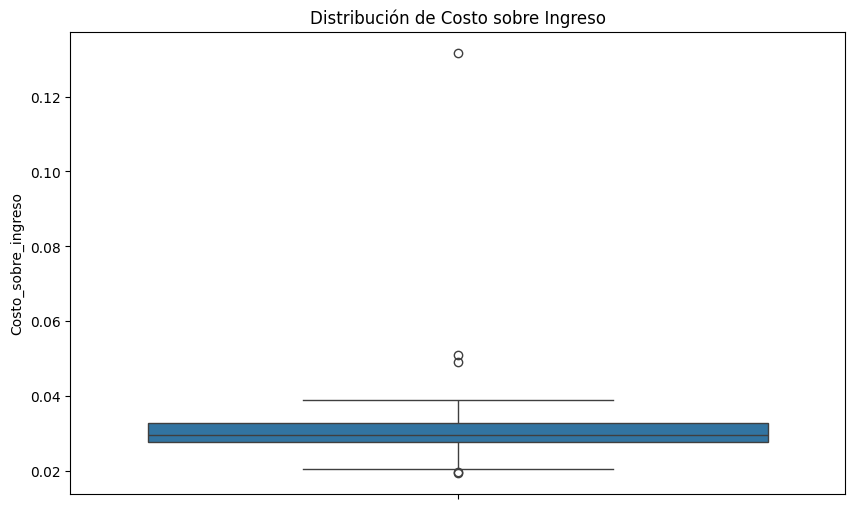

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Costo_sobre_ingreso'])
plt.title('Distribución de Costo sobre Ingreso')
plt.show()

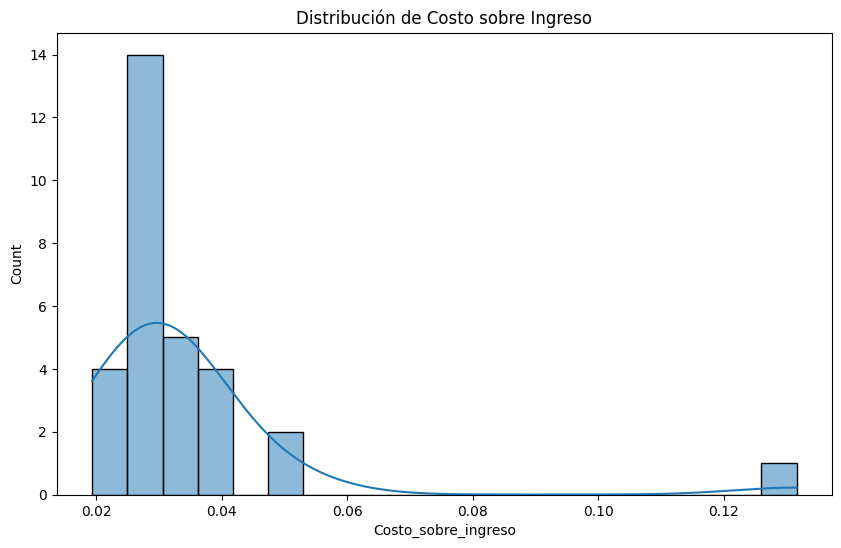

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Costo_sobre_ingreso'], bins=20, kde=True)
plt.title('Distribución de Costo sobre Ingreso')
plt.show()

##9. Estadística Descriptiva

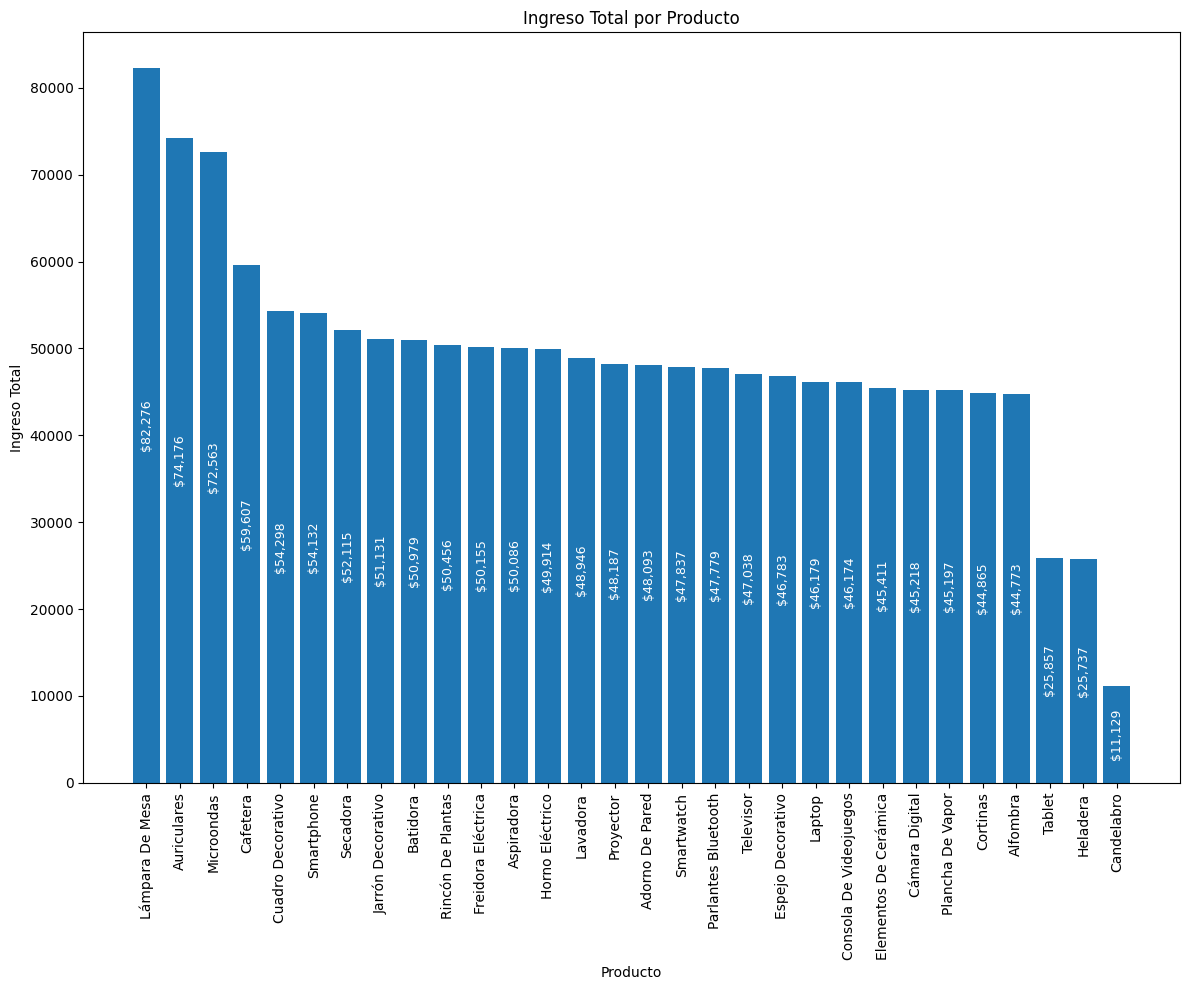

In [ ]:
grafico_producto = resumen_producto.copy()

grafico_producto = grafico_producto.sort_values(by='ingreso_total', ascending=False)

plt.figure(figsize=(12,10))
barras = plt.bar(grafico_producto['producto'], grafico_producto['ingreso_total'])
plt.xlabel('Producto')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Producto')

for barra in barras:
    y = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


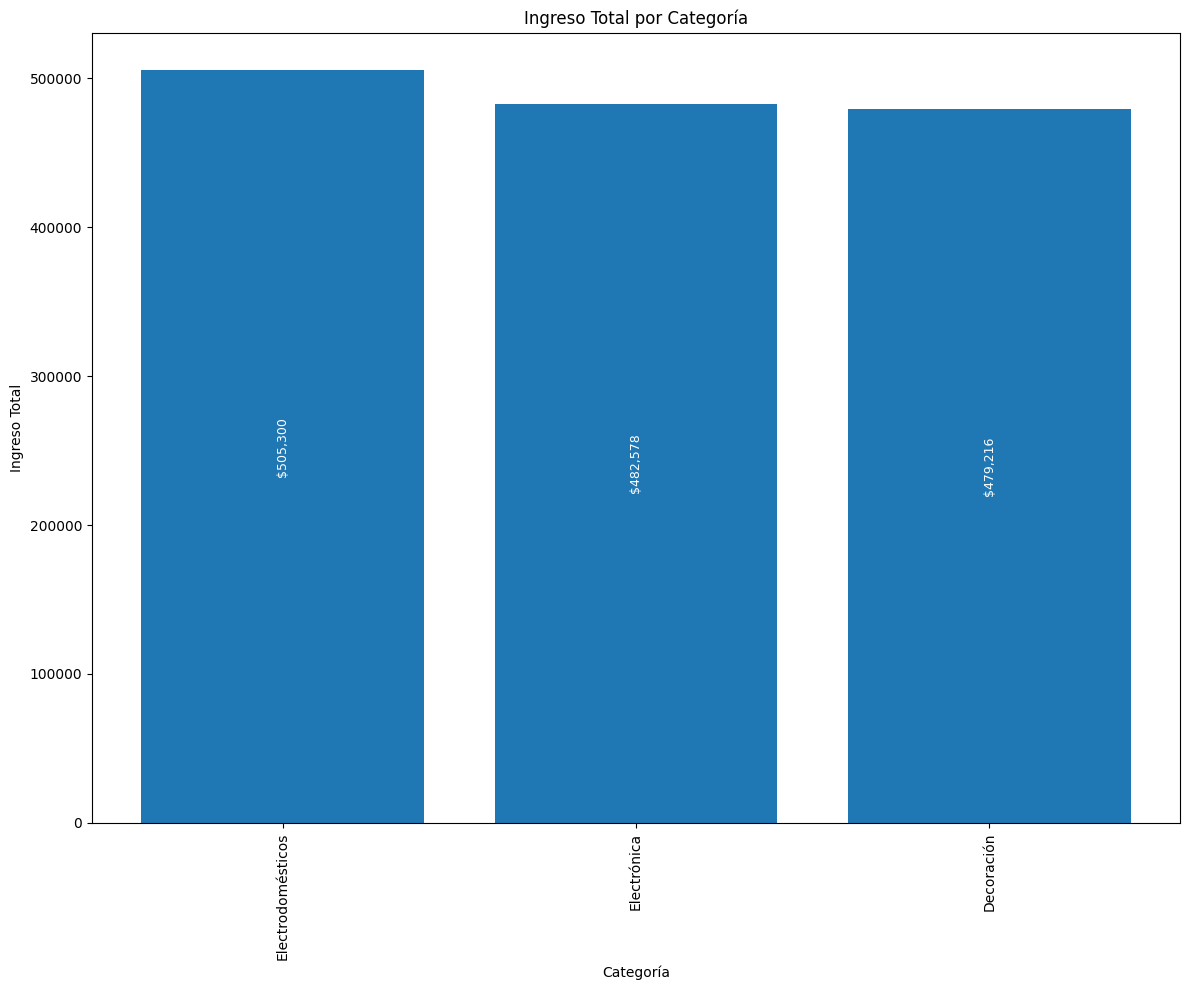

In [ ]:
grafico_categoria = resumen_categoria.copy()

grafico_categoria = grafico_categoria.sort_values(by='ingreso_total', ascending=False)

plt.figure(figsize=(12,10))
barras = plt.bar(grafico_categoria['categoria'], grafico_categoria['ingreso_total'])
plt.xlabel('Categoría')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total por Categoría')
plt.xticks(rotation=90)
for barra in barras:
    y = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )


plt.tight_layout()
plt.show()

In [ ]:
print( 'Medidas de Tendencia Central')
media = resumen_categoria['ingreso_total'].mean()
print( f"La media es {media: ,.2f}")
mediana = resumen_categoria['ingreso_total'].median()
print(f"La mediana es {mediana: ,.2f}")
moda = resumen_categoria['ingreso_total'].mode()
print(f"La moda es {moda}")

Medidas de Tendencia Central
La media es  489,031.17
La mediana es  482,577.80
La moda es 0    479216.09
1     482577.8
2    505299.63
Name: ingreso_total, dtype: Float64


In [ ]:
print('Medidas de Dispersión')
rango = resumen_categoria['ingreso_total'].max() - resumen_categoria['ingreso_total'].min()
print(f"El rango es {rango: ,.2f}")

varianza = resumen_categoria['ingreso_total'].var()
print(f"La varianza es {varianza}")

desviacion_estandar = resumen_categoria['ingreso_total'].std()
print(f"La desviación estándar es {desviacion_estandar}")

Medidas de Dispersión
El rango es  26,083.54
La varianza es 201322285.26743323
La desviación estándar es 14188.808451291223


In [ ]:
q1 = resumen_categoria['ingreso_total'].quantile(0.25)
q3 = resumen_categoria['ingreso_total'].quantile(0.75)

iqr = q3 - q1

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: 480896.945
Q3: 493938.71499999997
IQR: 13041.76999999996


In [ ]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

print(f"Límite inferior: {lim_inf}")
print(f"Límite superior: {lim_sup}")

outliers = resumen_categoria[(resumen_categoria['ingreso_total'] < lim_inf) | (resumen_categoria['ingreso_total'] > lim_sup)]

print("Outliers:")
print(outliers)

Límite inferior: 461334.29000000004
Límite superior: 513501.3699999999
Outliers:
Empty DataFrame
Columns: [categoria, ingreso_total, unidades, ventas, precio_promedio, ticket_promedio]
Index: []


##10. Análisis Exploratorio de datos con gráficos

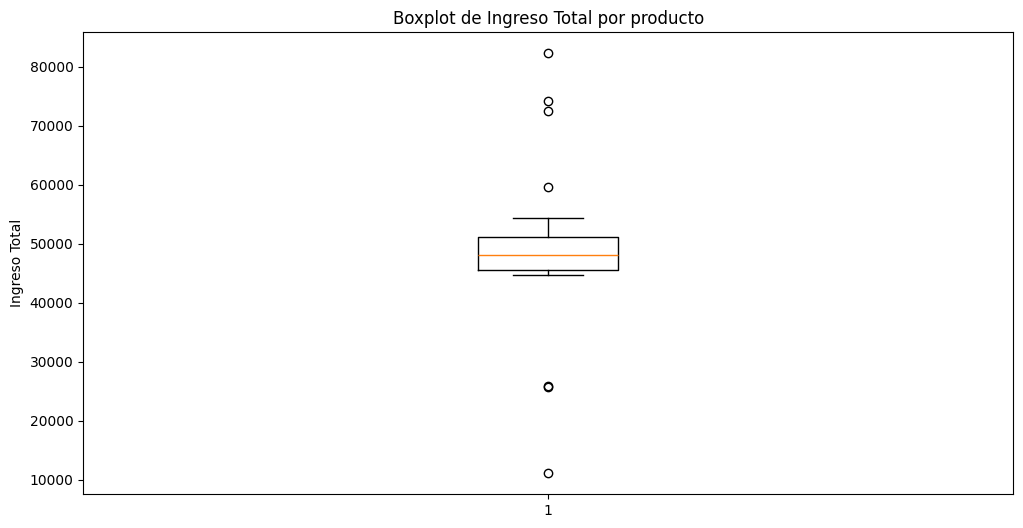

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot(resumen_producto['ingreso_total'])
plt.title('Boxplot de Ingreso Total por producto')
plt.ylabel('Ingreso Total')
plt.tight_layout
plt.show()

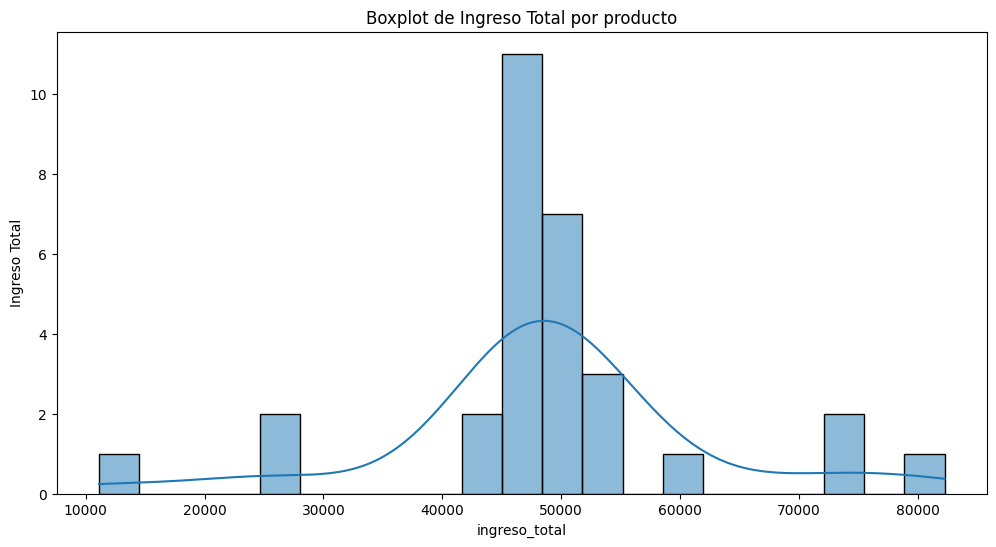

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(resumen_producto['ingreso_total'], kde= True)
plt.title('Boxplot de Ingreso Total por producto')
plt.ylabel('Ingreso Total')
plt.show()

##11. Correlación

La correlación entre precio promedio y unidades es: 0.21683411231315824
Relación positiva debíl a moderada


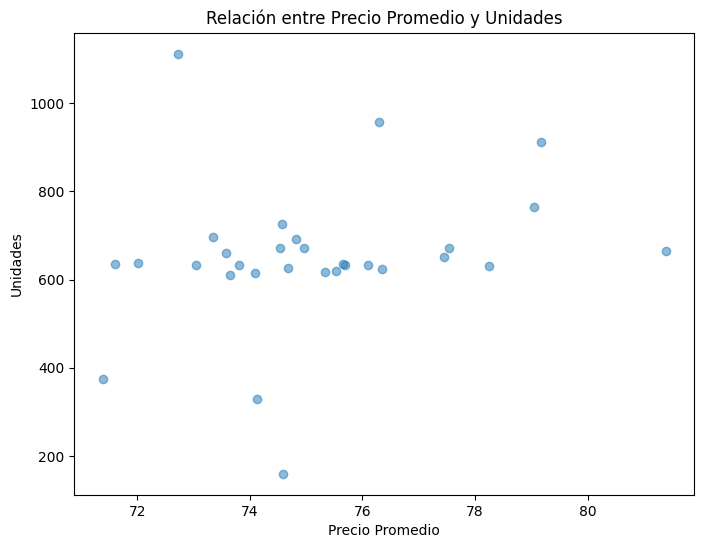

In [ ]:
x = resumen_producto['precio_promedio']
y = resumen_producto['unidades']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Precio Promedio')
plt.ylabel('Unidades')
plt.title('Relación entre Precio Promedio y Unidades')

correlacion = x.corr(y)

print(f"La correlación entre precio promedio y unidades es: {correlacion}")

if correlacion > 0.8:
  print('Relacion positiva clara (a mayor precio promedio, mayor cantidad de unidad se suelen vender)')
elif correlacion >0.2:
  print('Relación positiva debíl a moderada')
elif correlacion < -0.8:
  print('Relación negativa clara (a mayor precio promedio, menor cantidad de unidad se suelen vender)')
elif correlacion < -0.2:
  print('Relación negativa moderada (a mayor precio promedio, menor cantidad de unidad se suelen vender)')
else:
  print('relacion muy débil o nula')

Text(0.5, 1.0, 'Ingreso Total por Producto')

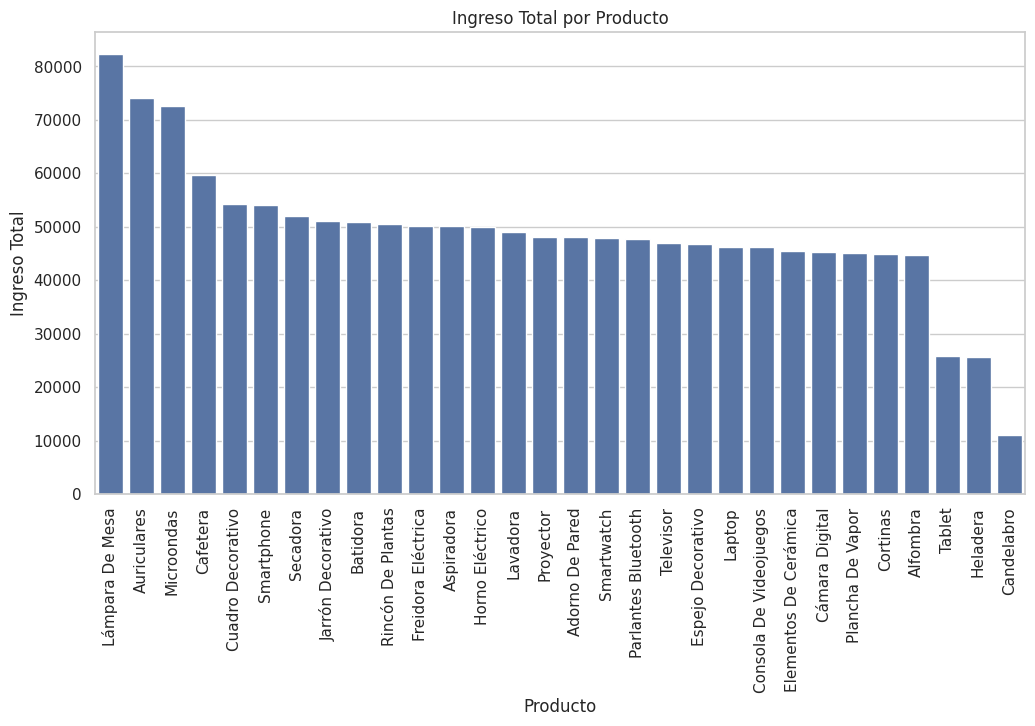

In [ ]:
sns.set_theme(style = 'whitegrid')
graf_barras = resumen_producto.sort_values(by='ingreso_total', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='producto', y='ingreso_total', data=graf_barras)
plt.xlabel('Producto')
plt.ylabel('Ingreso Total')
plt.xticks (rotation=90)
plt.title('Ingreso Total por Producto')